# Porfolio performance analysis

In [ ]:
import yfinance as yf
from datetime import datetime
import numpy as np
import pandas as pd

# Set up tickers and dates
ticker = ['SPOT', 'GOOGL', 'PLD', 'AMT', 'ESGE', 'BSX', 'ISRG', 'UNH', 'FSLR', 'NVDA', 'GOVT', 'GLD']
start_date = datetime(2024, 10, 7)
end_date = datetime(2024, 11, 20)
risk_free_rate = 0.0418  

max_sharpe_allocation = {
    'AMT': 0.012642, 'BSX': 0.039673, 'ESGE': 0.020433, 'FSLR': 0.148225, 'GLD': 0.126809,
    'GOOGL': 0.115092, 'GOVT': 0.044606, 'ISRG': 0.031759, 'NVDA': 0.243837, 'PLD': 0.023082,
    'SPOT': 0.046035, 'UNH': 0.147807 # Optimal portfolio weights
}

assets = yf.download(ticker, start=start_date, end=end_date)['Adj Close']
assets = assets.fillna(method='bfill')

log_returns = np.log(assets / assets.shift(1))

weights = np.array([max_sharpe_allocation[ticker] for ticker in assets.columns])

portfolio_returns_daily = (log_returns * weights).sum(axis=1)

portfolio_returns_weekly = portfolio_returns_daily.resample('W').apply(lambda x: np.exp(np.sum(x)) - 1)

weekly_risk_free_rate = risk_free_rate / 52
weekly_sharpe_ratios = (portfolio_returns_weekly - weekly_risk_free_rate) / portfolio_returns_weekly.std()

performance_df = pd.DataFrame({
    'Weekly Return': portfolio_returns_weekly,
    'Sharpe Ratio': weekly_sharpe_ratios
})

round(performance_df, 3)

[*********************100%%**********************]  12 of 12 completed
C:\Users\jedre\AppData\Local\Temp\ipykernel_10080\3871586615.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  assets = assets.fillna(method='bfill')


,Weekly Return,Sharpe Ratio
Date,,
2024-10-13,0.008,0.423
2024-10-20,-0.002,-0.168
2024-10-27,0.002,0.047
2024-11-03,-0.004,-0.259
2024-11-10,0.034,1.860
2024-11-17,-0.024,-1.407
2024-11-24,0.013,0.699


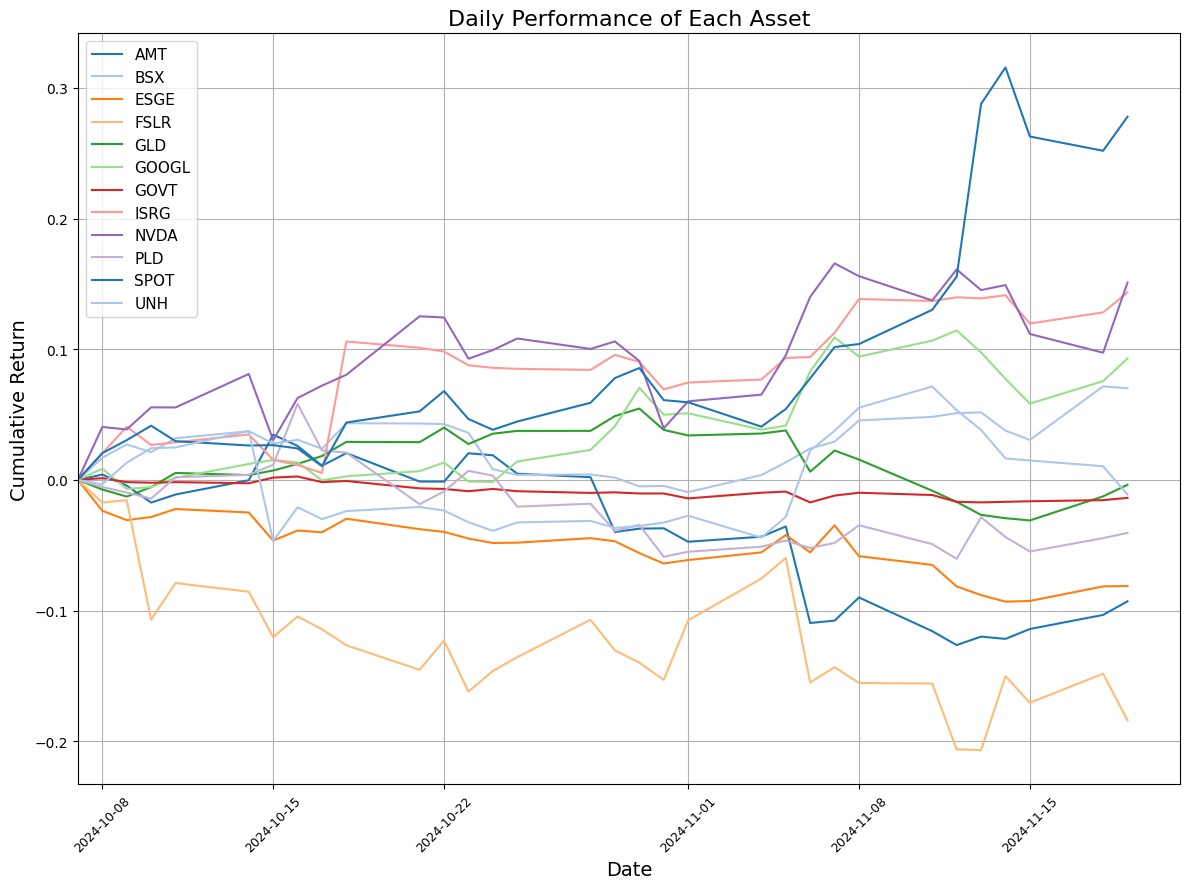

In [ ]:
import matplotlib.pyplot as plt

cumulative_returns = (assets / assets.iloc[0]) - 1


plt.figure(figsize=(12, 9))
colormap = plt.get_cmap('tab20')

for i, column in enumerate(cumulative_returns.columns):
    plt.plot(cumulative_returns.index, cumulative_returns[column], label=column, color=colormap(i % 10))

plt.title('Daily Performance of Each Asset', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Cumulative Return', fontsize=14)

plt.legend(loc="upper left", fontsize=11) 

plt.xticks(rotation=45, fontsize=9)
plt.yticks(fontsize=10)
plt.grid(True)

plt.xlim(left=datetime(2024, 10, 7))  

# Show the plot
plt.tight_layout()
plt.show()


C:\Users\jedre\AppData\Local\Temp\ipykernel_10080\313051495.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="upper left")


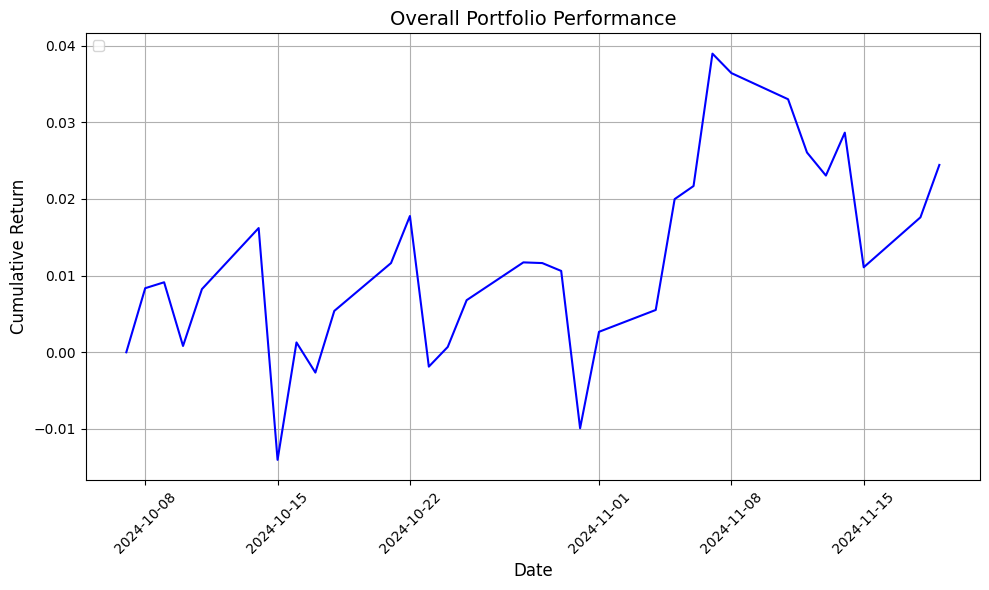

In [ ]:
portfolio_cumulative_returns = (1 + portfolio_returns_daily).cumprod() - 1

plt.figure(figsize=(10, 6))

plt.plot(portfolio_cumulative_returns.index, portfolio_cumulative_returns, color='blue')
plt.title('Overall Portfolio Performance', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Cumulative Return', fontsize=12)
plt.legend(loc="upper left")
plt.grid(True)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

C:\Users\jedre\AppData\Local\Temp\ipykernel_10080\3597676547.py:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, p, 'k', color='red', label="Normal Distribution")


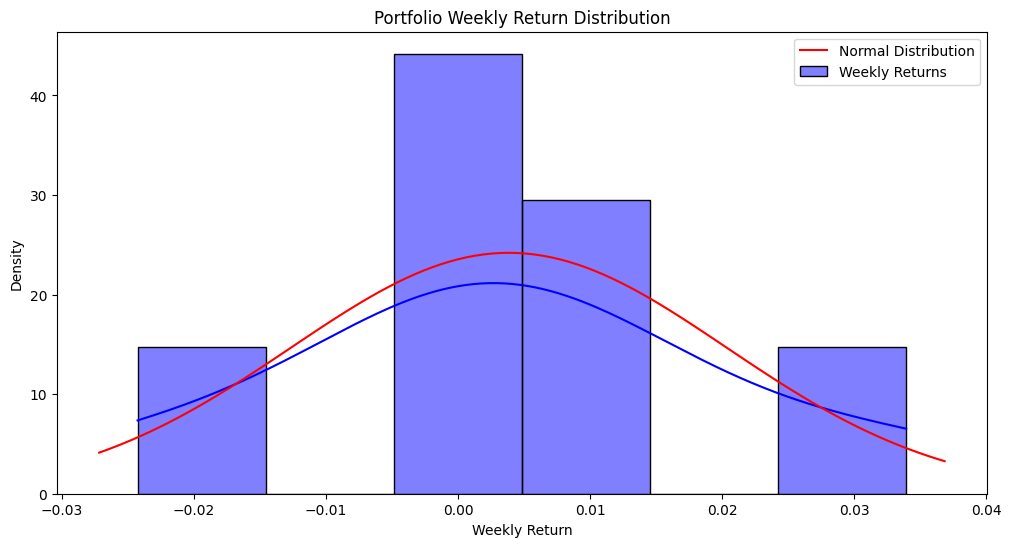

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

portfolio_returns_weekly = portfolio_returns_daily.resample('W').apply(lambda x: np.exp(np.sum(x)) - 1)


plt.figure(figsize=(12, 6))
sns.histplot(portfolio_returns_weekly, bins=6, kde=True, color='blue', stat="density", label="Weekly Returns")

# Norm
mu, std = norm.fit(portfolio_returns_weekly)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', color='red', label="Normal Distribution")

# Add labels and title with skewness and kurtosis
plt.title('Portfolio Weekly Return Distribution')
plt.xlabel('Weekly Return')
plt.ylabel('Density')
plt.legend()

# Display the plot
plt.show()


## Assets' returns - summary

[*********************100%%**********************]  12 of 12 completed
C:\Users\jedre\AppData\Local\Temp\ipykernel_12064\528043485.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  assets = assets.fillna(method='bfill')


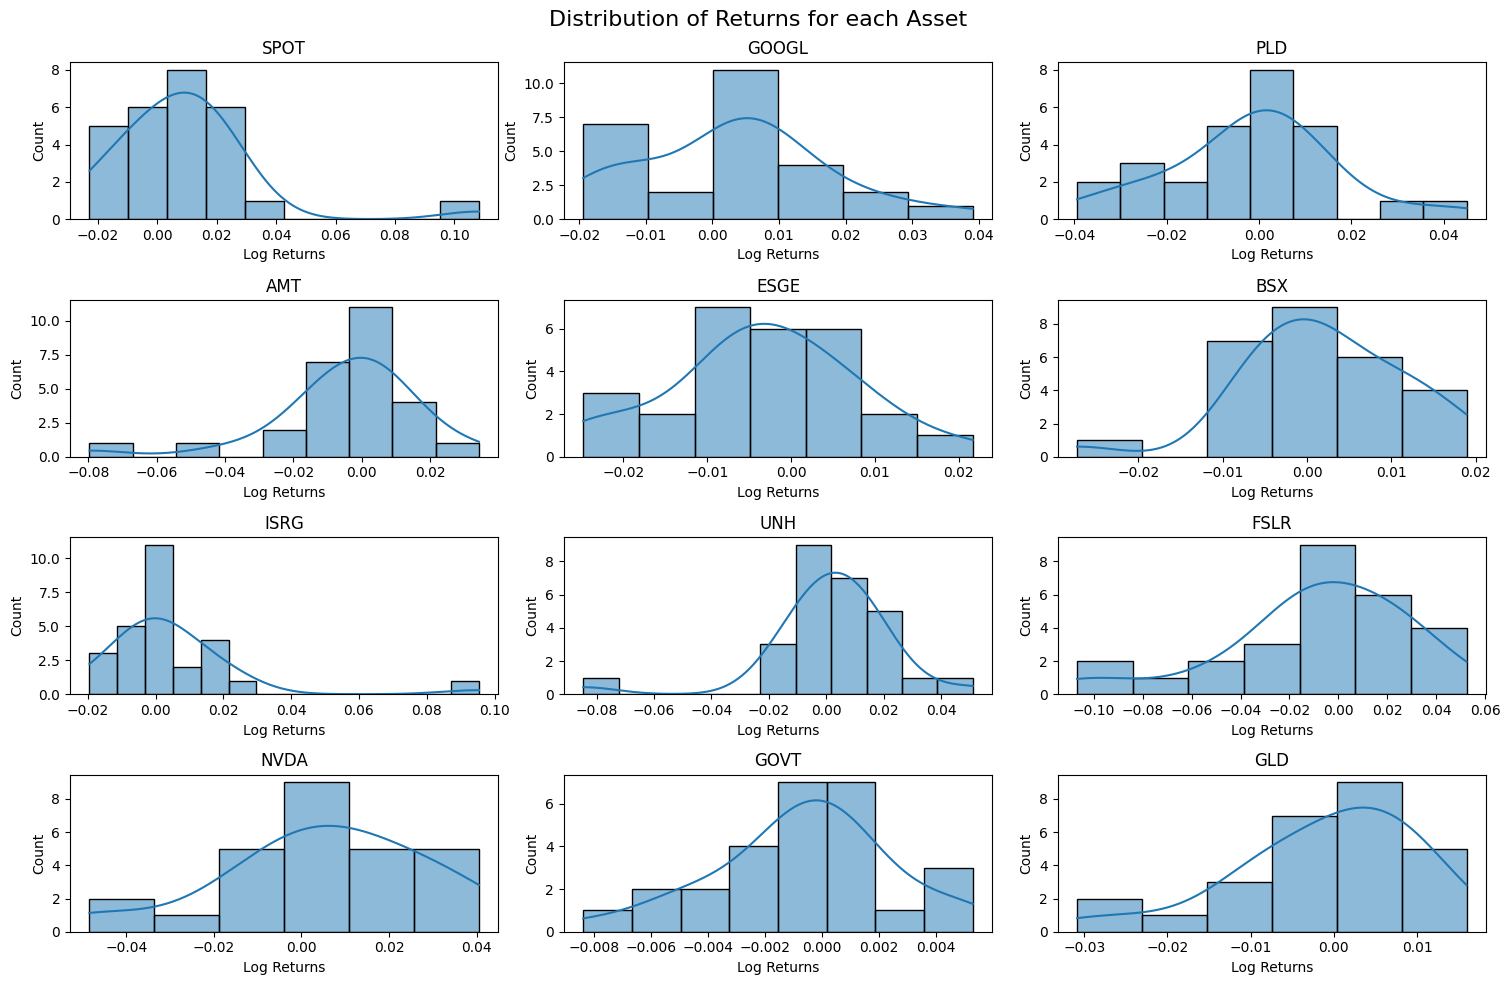

In [ ]:

ticker = ['SPOT', 'GOOGL', 'PLD', 'AMT', 'ESGE', 'BSX', 'ISRG', 'UNH', 'FSLR', 'NVDA', 'GOVT', 'GLD']
end_date = datetime(2024, 11, 14) 
start_date = datetime(2024, 10, 7)  


assets = yf.download(ticker, start=start_date, end=end_date)['Adj Close']
assets = assets.fillna(method='bfill')

log_returns = np.log((assets / assets.shift(1)))

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 10))
axes = axes.flatten()

fig.suptitle('Distribution of Returns for each Asset', fontsize=16)

for i, asset in enumerate(ticker):
    sns.histplot(log_returns[asset].dropna(), kde=True, ax=axes[i])
    axes[i].set_title(asset)
    axes[i].set_xlabel('Log Returns')

plt.tight_layout()
plt.show()

### Avg weekly returns

In [ ]:

ticker = ['SPOT', 'GOOGL', 'PLD', 'AMT', 'ESGE', 'BSX', 'ISRG', 'UNH', 'FSLR', 'NVDA', 'GOVT', 'GLD']
start_date = datetime(2024, 10, 7)
end_date = datetime(2024, 11, 14)
risk_free_rate = 0.0418  # Example annual risk-free rate, adjust as needed

assets = yf.download(ticker, start=start_date, end=end_date)['Adj Close']
assets = assets.fillna(method='bfill')
log_returns = np.log(assets / assets.shift(1))
weekly_returns = log_returns.resample('W').apply(lambda x: np.exp(np.sum(x)) - 1)

average_weekly_returns = weekly_returns.mean()*100

performance_df = pd.DataFrame({
    'Average Weekly Return': round(average_weekly_returns, 3).sort_values(ascending=False) 
})

performance_df


[*********************100%%**********************]  12 of 12 completed
C:\Users\jedre\AppData\Local\Temp\ipykernel_8972\3249413226.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  assets = assets.fillna(method='bfill')


,Average Weekly Return
Ticker,
SPOT,4.447
NVDA,2.376
ISRG,2.252
GOOGL,1.577
BSX,0.887
UNH,0.710
GOVT,-0.288
GLD,-0.429
PLD,-0.452
